
# experiment


In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
df = pd.read_csv("ourcovid.csv")
df

,node1,node2
0,BCAR1,SH2D3A
1,C6orf48,SH2D3A
2,C6orf48,SPECC1
3,C6orf48,PRSS57
4,DDX58,SH2D3A
...,...,...
1172,LRP5,WNT3A
1173,LRP6,WNT3A
1174,PLG,TTR
1175,PLG,RBP4


In [4]:
df.shape

(1177, 2)

In [5]:
uniqueValues =df.nunique()
print('Count of unique value sin each column :')
print(uniqueValues)

Count of unique value sin each column :
node1    130
node2    171
dtype: int64


In [6]:
adj_mat = pd.crosstab(df["node1"], df["node2"], dropna=False)
adj_mat

node2,AHSG,AIMP1,AIMP2,APCS,APOA1,APOA2,APOB,APOC3,ATM,BCAR1,...,TCHH,TGM1,TGM5,TP53BP1,TTR,WAPAL,WNT3A,ZBTB20,ZC3H7B,ZMYND8
node1,,,,,,,,,,,,,,,,,,,,,
ABCA1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
AFM,1,0,0,1,1,1,0,1,0,0,...,0,0,0,0,1,0,1,1,0,0
AHSG,0,0,0,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
AIMP1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIMP2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPRR2F,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
SPRR2G,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
SPRR3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [7]:
adj_mat1 = pd.crosstab(df["node2"], df["node1"], dropna=False)
adj_mat1

node1,ABCA1,AFM,AHSG,AIMP1,AIMP2,APCS,APOA1,APOA2,APOB,APOC3,...,SPRR1B,SPRR2A,SPRR2B,SPRR2D,SPRR2E,SPRR2F,SPRR2G,SPRR3,TCHH,TGM1
node2,,,,,,,,,,,,,,,,,,,,,
AHSG,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIMP1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIMP2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APCS,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
APOA1,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WAPAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WNT3A,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZBTB20,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import networkx as nx
from numpy import random as nprand
import pandas as pd
import random
import re


In [9]:
%matplotlib inline

import pandas as pd
import networkx as nx
import matplotlib 
import matplotlib.pyplot as plt



In [10]:
records = []
for i in range(0,1177):
    records.append([str(df.values[i, j]) for j in range(0,2)])
records


[['BCAR1', 'SH2D3A'],
 ['C6orf48', 'SH2D3A'],
 ['C6orf48', 'SPECC1'],
 ['C6orf48', 'PRSS57'],
 ['DDX58', 'SH2D3A'],
 ['DDX58', 'PRSS57'],
 ['DDX58', 'IRF3'],
 ['IRF3', 'SH2D3A'],
 ['IRF3', 'PHGDH'],
 ['IRF3', 'DDX58'],
 ['IRF3', 'PRSS57'],
 ['NUP93', 'NUTF2'],
 ['NUP93', 'SH2D3A'],
 ['NUP93', 'NXF1'],
 ['NUTF2', 'PHGDH'],
 ['NUTF2', 'NUP93'],
 ['NUTF2', 'SH2D3A'],
 ['NUTF2', 'NXF1'],
 ['NXF1', 'NUTF2'],
 ['NXF1', 'SH2D3A'],
 ['NXF1', 'NUP93'],
 ['NXF1', 'PHGDH'],
 ['PHGDH', 'NUTF2'],
 ['PHGDH', 'SH2D3A'],
 ['PHGDH', 'NXF1'],
 ['PHGDH', 'IRF3'],
 ['PRSS57', 'SH2D3A'],
 ['PRSS57', 'SPECC1'],
 ['PRSS57', 'C6orf48'],
 ['PRSS57', 'DDX58'],
 ['PRSS57', 'IRF3'],
 ['SH2D3A', 'NUTF2'],
 ['SH2D3A', 'PHGDH'],
 ['SH2D3A', 'NUP93'],
 ['SH2D3A', 'C6orf48'],
 ['SH2D3A', 'BCAR1'],
 ['SH2D3A', 'NXF1'],
 ['SH2D3A', 'DDX58'],
 ['SH2D3A', 'SPECC1'],
 ['SH2D3A', 'IRF3'],
 ['SH2D3A', 'PRSS57'],
 ['SPECC1', 'SH2D3A'],
 ['SPECC1', 'C6orf48'],
 ['SPECC1', 'PRSS57'],
 ['ARHGEF6', 'LIMS1'],
 ['ARHGEF6', 'PARVA']

In [11]:
df["node1"].unique()

array(['BCAR1', 'C6orf48', 'DDX58', 'IRF3', 'NUP93', 'NUTF2', 'NXF1',
       'PHGDH', 'PRSS57', 'SH2D3A', 'SPECC1', 'ARHGEF6', 'ATL1', 'BACE1',
       'CHMP1B', 'FOS', 'FOSB', 'ILK', 'IST1', 'JUN', 'JUNB', 'LIMS1',
       'LINGO1', 'NGFR', 'NUS1', 'OMG', 'PARVA', 'PARVB', 'PSTK', 'REEP1',
       'REEP2', 'REEP5', 'REEP6', 'RTN2', 'RTN4', 'SARS', 'SARS2',
       'CAPRIN1', 'CRK', 'DOCK1', 'EFS', 'EIF4A1', 'EIF4A2', 'EIF4G1',
       'FAM221A', 'G3BP1', 'IKBKB', 'NFKB1', 'PABPC1', 'PTK2', 'SH2D3C',
       'CANX', 'CAV1', 'FN1', 'HSP90AA1', 'KIR2DL4', 'AIMP1', 'AIMP2',
       'ATM', 'BRCA1', 'CCNB1', 'CCNB2', 'CDCA5', 'CDK1', 'CTNNB1',
       'CXCR4', 'DARS', 'DBN1', 'EEF1E1', 'EID3', 'EPRS', 'ESCO1',
       'ESCO2', 'ESPL1', 'GJA1', 'H2AFX', 'HDAC8', 'CASP14', 'CDSN',
       'DSC1', 'DSG1', 'DSP', 'ERBB2IP', 'FLG', 'IVL', 'JUP', 'KLK7',
       'LCE1A', 'LCE1B', 'LCE1D', 'LCE1E', 'LCE1F', 'LCE2A', 'LCE2B',
       'LCE2C', 'LCE3A', 'LCE3B', 'LCE3C', 'LCE4A', 'LCE6A', 'LOR',
       'PKP1', '

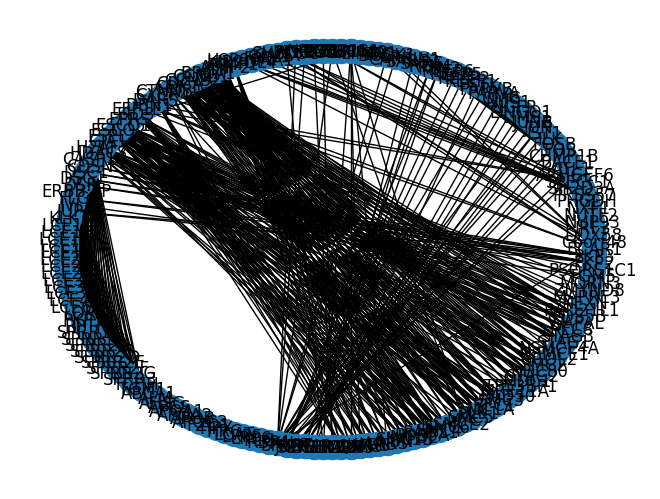

In [12]:

# The original dataset is from:
# Gabasova, E. (2016). Star Wars social network. DOI: https://doi.org/10.5281/zenodo.1411479
# 
# Simplified by Federico Albanese.

characters =['BCAR1', 'C6orf48', 'DDX58', 'IRF3', 'NUP93', 'NUTF2', 'NXF1',
       'PHGDH', 'PRSS57', 'SH2D3A', 'SPECC1', 'ARHGEF6', 'ATL1', 'BACE1',
       'CHMP1B', 'FOS', 'FOSB', 'ILK', 'IST1', 'JUN', 'JUNB', 'LIMS1',
       'LINGO1', 'NGFR', 'NUS1', 'OMG', 'PARVA', 'PARVB', 'PSTK', 'REEP1',
       'REEP2', 'REEP5', 'REEP6', 'RTN2', 'RTN4', 'SARS', 'SARS2',
       'CAPRIN1', 'CRK', 'DOCK1', 'EFS', 'EIF4A1', 'EIF4A2', 'EIF4G1',
       'FAM221A', 'G3BP1', 'IKBKB', 'NFKB1', 'PABPC1', 'PTK2', 'SH2D3C',
       'CANX', 'CAV1', 'FN1', 'HSP90AA1', 'KIR2DL4', 'AIMP1', 'AIMP2',
       'ATM', 'BRCA1', 'CCNB1', 'CCNB2', 'CDCA5', 'CDK1', 'CTNNB1',
       'CXCR4', 'DARS', 'DBN1', 'EEF1E1', 'EID3', 'EPRS', 'ESCO1',
       'ESCO2', 'ESPL1', 'GJA1', 'H2AFX', 'HDAC8', 'CASP14', 'CDSN',
       'DSC1', 'DSG1', 'DSP', 'ERBB2IP', 'FLG', 'IVL', 'JUP', 'KLK7',
       'LCE1A', 'LCE1B', 'LCE1D', 'LCE1E', 'LCE1F', 'LCE2A', 'LCE2B',
       'LCE2C', 'LCE3A', 'LCE3B', 'LCE3C', 'LCE4A', 'LCE6A', 'LOR',
       'PKP1', 'RPTN', 'SPRR1A', 'SPRR1B', 'SPRR2A', 'SPRR2B', 'SPRR2D',
       'SPRR2E', 'SPRR2F', 'SPRR2G', 'SPRR3', 'TCHH', 'TGM1', 'ABCA1',
       'AFM', 'AHSG', 'APCS', 'APOA1', 'APOA2', 'APOB', 'APOC3', 'FZD1',
       'HPX', 'HRG', 'LCAT', 'LRP5', 'LRP6', 'PLG', 'RBP4']

edges = [['BCAR1', 'SH2D3A'],
 ['C6orf48', 'SH2D3A'],
 ['C6orf48', 'SPECC1'],
 ['C6orf48', 'PRSS57'],
 ['DDX58', 'SH2D3A'],
 ['DDX58', 'PRSS57'],
 ['DDX58', 'IRF3'],
 ['IRF3', 'SH2D3A'],
 ['IRF3', 'PHGDH'],
 ['IRF3', 'DDX58'],
 ['IRF3', 'PRSS57'],
 ['NUP93', 'NUTF2'],
 ['NUP93', 'SH2D3A'],
 ['NUP93', 'NXF1'],
 ['NUTF2', 'PHGDH'],
 ['NUTF2', 'NUP93'],
 ['NUTF2', 'SH2D3A'],
 ['NUTF2', 'NXF1'],
 ['NXF1', 'NUTF2'],
 ['NXF1', 'SH2D3A'],
 ['NXF1', 'NUP93'],
 ['NXF1', 'PHGDH'],
 ['PHGDH', 'NUTF2'],
 ['PHGDH', 'SH2D3A'],
 ['PHGDH', 'NXF1'],
 ['PHGDH', 'IRF3'],
 ['PRSS57', 'SH2D3A'],
 ['PRSS57', 'SPECC1'],
 ['PRSS57', 'C6orf48'],
 ['PRSS57', 'DDX58'],
 ['PRSS57', 'IRF3'],
 ['SH2D3A', 'NUTF2'],
 ['SH2D3A', 'PHGDH'],
 ['SH2D3A', 'NUP93'],
 ['SH2D3A', 'C6orf48'],
 ['SH2D3A', 'BCAR1'],
 ['SH2D3A', 'NXF1'],
 ['SH2D3A', 'DDX58'],
 ['SH2D3A', 'SPECC1'],
 ['SH2D3A', 'IRF3'],
 ['SH2D3A', 'PRSS57'],
 ['SPECC1', 'SH2D3A'],
 ['SPECC1', 'C6orf48'],
 ['SPECC1', 'PRSS57'],
 ['ARHGEF6', 'LIMS1'],
 ['ARHGEF6', 'PARVA'],
 ['ARHGEF6', 'ILK'],
 ['ARHGEF6', 'PXN'],
 ['ARHGEF6', 'PARVB'],
 ['ATL1', 'REEP6'],
 ['ATL1', 'RTN2'],
 ['ATL1', 'RTN4'],
 ['ATL1', 'IST1'],
 ['ATL1', 'CHMP1B'],
 ['ATL1', 'REEP5'],
 ['ATL1', 'REEP2'],
 ['ATL1', 'REEP1'],
 ['ATL1', 'SPAST'],
 ['BACE1', 'NGFR'],
 ['BACE1', 'RTN2'],
 ['BACE1', 'JUN'],
 ['BACE1', 'RTN4'],
 ['CHMP1B', 'SPAST'],
 ['CHMP1B', 'IST1'],
 ['FOS', 'FOSB'],
 ['FOS', 'JUND'],
 ['FOS', 'JUNB'],
 ['FOS', 'ILK'],
 ['FOS', 'JUN'],
 ['FOSB', 'PARVA'],
 ['FOSB', 'PARVB'],
 ['FOSB', 'RTN2'],
 ['FOSB', 'JUNB'],
 ['FOSB', 'JUN'],
 ['FOSB', 'JUND'],
 ['ILK', 'PXN'],
 ['ILK', 'PARVA'],
 ['ILK', 'JUN'],
 ['ILK', 'LIMS1'],
 ['ILK', 'PARVB'],
 ['IST1', 'REEP1'],
 ['IST1', 'SPAST'],
 ['JUN', 'NGFR'],
 ['JUN', 'JUND'],
 ['JUN', 'PXN'],
 ['JUN', 'JUNB'],
 ['JUNB', 'JUND'],
 ['LIMS1', 'PXN'],
 ['LIMS1', 'PARVA'],
 ['LIMS1', 'PARVB'],
 ['LINGO1', 'RTN4R'],
 ['LINGO1', 'NGFR'],
 ['LINGO1', 'OMG'],
 ['LINGO1', 'RTN4'],
 ['NGFR', 'RTN4R'],
 ['NGFR', 'OMG'],
 ['NGFR', 'RTN4'],
 ['NUS1', 'RTN4R'],
 ['NUS1', 'RTN2'],
 ['NUS1', 'OMG'],
 ['NUS1', 'RTN4'],
 ['NUS1', 'REEP5'],
 ['OMG', 'RTN4R'],
 ['OMG', 'RTN2'],
 ['OMG', 'REEP5'],
 ['OMG', 'RTN4'],
 ['PARVA', 'RTN2'],
 ['PARVA', 'PXN'],
 ['PARVA', 'PSTK'],
 ['PARVA', 'PARVB'],
 ['PARVB', 'RTN2'],
 ['PARVB', 'PXN'],
 ['PARVB', 'PSTK'],
 ['PSTK', 'SARS'],
 ['PSTK', 'RTN2'],
 ['PSTK', 'SEPSECS'],
 ['PSTK', 'SARS2'],
 ['REEP1', 'RTN2'],
 ['REEP1', 'RTN4'],
 ['REEP1', 'REEP2'],
 ['REEP1', 'SPAST'],
 ['REEP2', 'RTN2'],
 ['REEP2', 'RTN4'],
 ['REEP2', 'SPAST'],
 ['REEP5', 'REEP6'],
 ['REEP5', 'RTN2'],
 ['REEP5', 'RTN4'],
 ['REEP5', 'SPAST'],
 ['REEP6', 'RTN4'],
 ['REEP6', 'RTN2'],
 ['RTN2', 'RTN4R'],
 ['RTN2', 'RTN4'],
 ['RTN2', 'SPAST'],
 ['RTN4', 'RTN4R'],
 ['RTN4', 'SPAST'],
 ['SARS', 'SEPSECS'],
 ['SARS2', 'SEPSECS'],
 ['BCAR1', 'PXN'],
 ['BCAR1', 'DOCK1'],
 ['BCAR1', 'CRK'],
 ['BCAR1', 'SH2D3C'],
 ['BCAR1', 'PTK2'],
 ['C6orf48', 'SPECC1'],
 ['C6orf48', 'SH2D3C'],
 ['C6orf48', 'PRSS57'],
 ['CAPRIN1', 'EIF4A1'],
 ['CAPRIN1', 'PABPC1'],
 ['CAPRIN1', 'EIF4A2'],
 ['CAPRIN1', 'EIF4G1'],
 ['CAPRIN1', 'G3BP1'],
 ['CRK', 'EFS'],
 ['CRK', 'PXN'],
 ['CRK', 'DOCK1'],
 ['CRK', 'PTK2'],
 ['DOCK1', 'PXN'],
 ['DOCK1', 'PTK2'],
 ['EFS', 'PTK2'],
 ['EFS', 'SH2D3C'],
 ['EIF4A1', 'G3BP1'],
 ['EIF4A1', 'EIF4A2'],
 ['EIF4A1', 'PABPC1'],
 ['EIF4A1', 'EIF4G1'],
 ['EIF4A2', 'PABPC1'],
 ['EIF4A2', 'G3BP1'],
 ['EIF4A2', 'EIF4G1'],
 ['EIF4G1', 'PABPC1'],
 ['EIF4G1', 'SH2D3C'],
 ['EIF4G1', 'ZC3H7B'],
 ['EIF4G1', 'G3BP1'],
 ['FAM221A', 'SH2D3C'],
 ['G3BP1', 'PXN'],
 ['G3BP1', 'PABPC1'],
 ['G3BP1', 'SH2D3C'],
 ['G3BP1', 'PRSS57'],
 ['IKBKB', 'NFKBIA'],
 ['IKBKB', 'NFKB1'],
 ['IKBKB', 'SH2D3C'],
 ['NFKB1', 'NFKBIA'],
 ['PABPC1', 'PXN'],
 ['PABPC1', 'SH2D3C'],
 ['PRSS57', 'SPECC1'],
 ['PRSS57', 'SH2D3C'],
 ['PTK2', 'PXN'],
 ['SH2D3C', 'SPECC1'],
 ['SH2D3C', 'ZC3H7B'],
 ['C6orf48', 'SH2D3A'],
 ['C6orf48', 'SPECC1'],
 ['C6orf48', 'SH2D3C'],
 ['C6orf48', 'KIR2DL4'],
 ['C6orf48', 'PRSS57'],
 ['CANX', 'CAV1'],
 ['CANX', 'PRSS57'],
 ['CANX', 'HSP90AA1'],
 ['CAV1', 'HSP90AA1'],
 ['CAV1', 'FN1'],
 ['CAV1', 'PRSS57'],
 ['FN1', 'HSP90AA1'],
 ['FN1', 'G3BP1'],
 ['FN1', 'PRSS57'],
 ['G3BP1', 'SH2D3A'],
 ['G3BP1', 'SH2D3C'],
 ['G3BP1', 'HSP90AA1'],
 ['G3BP1', 'PRSS57'],
 ['HSP90AA1', 'SH2D3C'],
 ['HSP90AA1', 'PRSS57'],
 ['KIR2DL4', 'SH2D3A'],
 ['KIR2DL4', 'SPECC1'],
 ['KIR2DL4', 'SH2D3C'],
 ['KIR2DL4', 'PRSS57'],
 ['PRSS57', 'SH2D3A'],
 ['PRSS57', 'SPECC1'],
 ['PRSS57', 'SH2D3C'],
 ['SH2D3A', 'SPECC1'],
 ['SH2D3C', 'SPECC1'],
 ['AIMP1', 'AIMP2'],
 ['AIMP1', 'RARS'],
 ['AIMP1', 'MARS'],
 ['AIMP1', 'DARS'],
 ['AIMP1', 'QARS'],
 ['AIMP1', 'KARS'],
 ['AIMP1', 'EPRS'],
 ['AIMP1', 'IARS'],
 ['AIMP1', 'EEF1E1'],
 ['AIMP1', 'LARS'],
 ['AIMP1', 'EIF4G1'],
 ['AIMP2', 'LARS'],
 ['AIMP2', 'IARS'],
 ['AIMP2', 'QARS'],
 ['AIMP2', 'MARS'],
 ['AIMP2', 'KARS'],
 ['AIMP2', 'DARS'],
 ['AIMP2', 'EPRS'],
 ['AIMP2', 'AIMP1'],
 ['AIMP2', 'EEF1E1'],
 ['AIMP2', 'RARS'],
 ['ATM', 'CCNB1'],
 ['ATM', 'ESPL1'],
 ['ATM', 'NBN'],
 ['ATM', 'ESCO1'],
 ['ATM', 'SMC1B'],
 ['ATM', 'NIPBL'],
 ['ATM', 'PDS5A'],
 ['ATM', 'CCNB2'],
 ['ATM', 'RAD21'],
 ['ATM', 'SMC4'],
 ['ATM', 'CTNNB1'],
 ['ATM', 'SMC6'],
 ['ATM', 'EEF1E1'],
 ['ATM', 'NSMCE2'],
 ['ATM', 'MYC'],
 ['ATM', 'SMC5'],
 ['ATM', 'PLK1'],
 ['ATM', 'CDK1'],
 ['ATM', 'SMC1A'],
 ['ATM', 'RFC1'],
 ['ATM', 'SMC3'],
 ['ATM', 'RAD50'],
 ['ATM', 'H2AFX'],
 ['ATM', 'MRE11A'],
 ['ATM', 'TP53BP1'],
 ['ATM', 'BRCA1'],
 ['ATM', 'MDC1'],
 ['BCAR1', 'SH2D3A'],
 ['BCAR1', 'SH2D3C'],
 ['BCAR1', 'CTNNB1'],
 ['BCAR1', 'CXCR4'],
 ['BRCA1', 'STAG2'],
 ['BRCA1', 'CCNB1'],
 ['BRCA1', 'ESPL1'],
 ['BRCA1', 'NDC80'],
 ['BRCA1', 'NBN'],
 ['BRCA1', 'ATM'],
 ['BRCA1', 'SMC2'],
 ['BRCA1', 'NSMCE2'],
 ['BRCA1', 'CCNB2'],
 ['BRCA1', 'RAD21'],
 ['BRCA1', 'PLK1'],
 ['BRCA1', 'ESCO2'],
 ['BRCA1', 'SMC1A'],
 ['BRCA1', 'MRE11A'],
 ['BRCA1', 'CTNNB1'],
 ['BRCA1', 'SMC4'],
 ['BRCA1', 'SMC1B'],
 ['BRCA1', 'SGOL2'],
 ['BRCA1', 'SMC3'],
 ['BRCA1', 'SMC5'],
 ['BRCA1', 'NSMCE1'],
 ['BRCA1', 'NSMCE4A'],
 ['BRCA1', 'MDC1'],
 ['BRCA1', 'RAD50'],
 ['BRCA1', 'RFC1'],
 ['BRCA1', 'TP53BP1'],
 ['BRCA1', 'STAG1'],
 ['BRCA1', 'CDK1'],
 ['BRCA1', 'SMC6'],
 ['BRCA1', 'STAG3'],
 ['BRCA1', 'REC8'],
 ['BRCA1', 'MYC'],
 ['BRCA1', 'H2AFX'],
 ['C6orf48', 'SH2D3A'],
 ['C6orf48', 'SPECC1'],
 ['C6orf48', 'SH2D3C'],
 ['C6orf48', 'PRSS57'],
 ['CCNB1', 'STAG2'],
 ['CCNB1', 'CTNNB1'],
 ['CCNB1', 'TP53BP1'],
 ['CCNB1', 'ATM'],
 ['CCNB1', 'MYC'],
 ['CCNB1', 'ESCO2'],
 ['CCNB1', 'SGOL2'],
 ['CCNB1', 'BRCA1'],
 ['CCNB1', 'WAPAL'],
 ['CCNB1', 'STAG1'],
 ['CCNB1', 'PDS5B'],
 ['CCNB1', 'PDS5A'],
 ['CCNB1', 'SMC3'],
 ['CCNB1', 'SMC1A'],
 ['CCNB1', 'RAD21'],
 ['CCNB1', 'SMC2'],
 ['CCNB1', 'SMC4'],
 ['CCNB1', 'CDCA5'],
 ['CCNB1', 'H2AFX'],
 ['CCNB1', 'NDC80'],
 ['CCNB1', 'ESPL1'],
 ['CCNB1', 'CCNB2'],
 ['CCNB1', 'PLK1'],
 ['CCNB1', 'CDK1'],
 ['CCNB2', 'STAG2'],
 ['CCNB2', 'CCNB1'],
 ['CCNB2', 'ESPL1'],
 ['CCNB2', 'NDC80'],
 ['CCNB2', 'CDCA5'],
 ['CCNB2', 'ATM'],
 ['CCNB2', 'SMC2'],
 ['CCNB2', 'TP53BP1'],
 ['CCNB2', 'SGOL2'],
 ['CCNB2', 'MYC'],
 ['CCNB2', 'H2AFX'],
 ['CCNB2', 'BRCA1'],
 ['CCNB2', 'ESCO2'],
 ['CCNB2', 'WAPAL'],
 ['CCNB2', 'STAG1'],
 ['CCNB2', 'PDS5A'],
 ['CCNB2', 'PDS5B'],
 ['CCNB2', 'SMC3'],
 ['CCNB2', 'SMC1A'],
 ['CCNB2', 'RAD21'],
 ['CCNB2', 'SMC4'],
 ['CCNB2', 'PLK1'],
 ['CCNB2', 'CDK1'],
 ['CDCA5', 'STAG2'],
 ['CDCA5', 'CCNB1'],
 ['CDCA5', 'ESPL1'],
 ['CDCA5', 'NDC80'],
 ['CDCA5', 'ESCO1'],
 ['CDCA5', 'SMC4'],
 ['CDCA5', 'RAD21L1'],
 ['CDCA5', 'HDAC8'],
 ['CDCA5', 'REC8'],
 ['CDCA5', 'H2AFX'],
 ['CDCA5', 'SMC1B'],
 ['CDCA5', 'SGOL2'],
 ['CDCA5', 'NIPBL'],
 ['CDCA5', 'STAG1'],
 ['CDCA5', 'ESCO2'],
 ['CDCA5', 'PLK1'],
 ['CDCA5', 'SMC1A'],
 ['CDCA5', 'PDS5B'],
 ['CDCA5', 'RAD21'],
 ['CDCA5', 'WAPAL'],
 ['CDCA5', 'CCNB2'],
 ['CDCA5', 'CDK1'],
 ['CDCA5', 'SMC3'],
 ['CDCA5', 'PDS5A'],
 ['CDK1', 'STAG2'],
 ['CDK1', 'CCNB1'],
 ['CDK1', 'ESPL1'],
 ['CDK1', 'NDC80'],
 ['CDK1', 'ESCO1'],
 ['CDK1', 'CDCA5'],
 ['CDK1', 'ATM'],
 ['CDK1', 'GJA1'],
 ['CDK1', 'SMC2'],
 ['CDK1', 'CCNB2'],
 ['CDK1', 'RAD21'],
 ['CDK1', 'WAPAL'],
 ['CDK1', 'PLK1'],
 ['CDK1', 'PDS5A'],
 ['CDK1', 'ESCO2'],
 ['CDK1', 'PDS5B'],
 ['CDK1', 'SMC1A'],
 ['CDK1', 'CTNNB1'],
 ['CDK1', 'SMC4'],
 ['CDK1', 'SGOL2'],
 ['CDK1', 'SMC3'],
 ['CDK1', 'SMC5'],
 ['CDK1', 'MDC1'],
 ['CDK1', 'TP53BP1'],
 ['CDK1', 'STAG1'],
 ['CDK1', 'SMC6'],
 ['CDK1', 'MYC'],
 ['CDK1', 'BRCA1'],
 ['CDK1', 'H2AFX'],
 ['CTNNB1', 'RARS'],
 ['CTNNB1', 'CCNB1'],
 ['CTNNB1', 'ATM'],
 ['CTNNB1', 'GJA1'],
 ['CTNNB1', 'PLK1'],
 ['CTNNB1', 'KARS'],
 ['CTNNB1', 'NEXN'],
 ['CTNNB1', 'BCAR1'],
 ['CTNNB1', 'G3BP1'],
 ['CTNNB1', 'CXCR4'],
 ['CTNNB1', 'CDK1'],
 ['CTNNB1', 'BRCA1'],
 ['CTNNB1', 'H2AFX'],
 ['CTNNB1', 'MYC'],
 ['CXCR4', 'DBN1'],
 ['CXCR4', 'CTNNB1'],
 ['CXCR4', 'MYC'],
 ['CXCR4', 'BCAR1'],
 ['DARS', 'AIMP2'],
 ['DARS', 'RARS'],
 ['DARS', 'MARS'],
 ['DARS', 'KARS'],
 ['DARS', 'AIMP1'],
 ['DARS', 'IARS'],
 ['DARS', 'EPRS'],
 ['DARS', 'LARS'],
 ['DARS', 'EEF1E1'],
 ['DARS', 'QARS'],
 ['DBN1', 'MAPRE3'],
 ['DBN1', 'SPECC1'],
 ['DBN1', 'GJA1'],
 ['DBN1', 'NEXN'],
 ['DBN1', 'ZMYND8'],
 ['DBN1', 'CXCR4'],
 ['EEF1E1', 'AIMP2'],
 ['EEF1E1', 'RARS'],
 ['EEF1E1', 'SPECC1'],
 ['EEF1E1', 'MARS'],
 ['EEF1E1', 'DARS'],
 ['EEF1E1', 'ATM'],
 ['EEF1E1', 'QARS'],
 ['EEF1E1', 'KARS'],
 ['EEF1E1', 'MORN3'],
 ['EEF1E1', 'EPRS'],
 ['EEF1E1', 'IARS'],
 ['EEF1E1', 'LARS'],
 ['EEF1E1', 'AIMP1'],
 ['EID3', 'STAG2'],
 ['EID3', 'NSMCE2'],
 ['EID3', 'RAD21'],
 ['EID3', 'SMC1A'],
 ['EID3', 'MRE11A'],
 ['EID3', 'SMC4'],
 ['EID3', 'SMC3'],
 ['EID3', 'SMC5'],
 ['EID3', 'NSMCE1'],
 ['EID3', 'NSMCE4A'],
 ['EID3', 'STAG1'],
 ['EID3', 'SMC6'],
 ['EIF4G1', 'MARS'],
 ['EIF4G1', 'QARS'],
 ['EIF4G1', 'SH2D3C'],
 ['EIF4G1', 'ZC3H7B'],
 ['EIF4G1', 'EPRS'],
 ['EIF4G1', 'G3BP1'],
 ['EIF4G1', 'LARS'],
 ['EIF4G1', 'AIMP1'],
 ['EIF4G1', 'MYC'],
 ['EPRS', 'AIMP2'],
 ['EPRS', 'RARS'],
 ['EPRS', 'MARS'],
 ['EPRS', 'DARS'],
 ['EPRS', 'QARS'],
 ['EPRS', 'KARS'],
 ['EPRS', 'HDAC8'],
 ['EPRS', 'EIF4G1'],
 ['EPRS', 'LARS'],
 ['EPRS', 'EEF1E1'],
 ['EPRS', 'AIMP1'],
 ['EPRS', 'IARS'],
 ['ESCO1', 'STAG2'],
 ['ESCO1', 'ESPL1'],
 ['ESCO1', 'NDC80'],
 ['ESCO1', 'ATM'],
 ['ESCO1', 'PLK1'],
 ['ESCO1', 'RFC1'],
 ['ESCO1', 'STAG3'],
 ['ESCO1', 'HDAC8'],
 ['ESCO1', 'SMC2'],
 ['ESCO1', 'CDK1'],
 ['ESCO1', 'SMC1B'],
 ['ESCO1', 'SMC4'],
 ['ESCO1', 'RAD21L1'],
 ['ESCO1', 'REC8'],
 ['ESCO1', 'SMC6'],
 ['ESCO1', 'CDCA5'],
 ['ESCO1', 'SMC5'],
 ['ESCO1', 'NIPBL'],
 ['ESCO1', 'STAG1'],
 ['ESCO1', 'SMC1A'],
 ['ESCO1', 'WAPAL'],
 ['ESCO1', 'PDS5B'],
 ['ESCO1', 'RAD21'],
 ['ESCO1', 'SMC3'],
 ['ESCO1', 'PDS5A'],
 ['ESCO2', 'STAG2'],
 ['ESCO2', 'CCNB1'],
 ['ESCO2', 'ESPL1'],
 ['ESCO2', 'NDC80'],
 ['ESCO2', 'CDCA5'],
 ['ESCO2', 'NIPBL'],
 ['ESCO2', 'SMC2'],
 ['ESCO2', 'CCNB2'],
 ['ESCO2', 'RAD21'],
 ['ESCO2', 'WAPAL'],
 ['ESCO2', 'PLK1'],
 ['ESCO2', 'PDS5A'],
 ['ESCO2', 'BRCA1'],
 ['ESCO2', 'RFC1'],
 ['ESCO2', 'SGOL2'],
 ['ESCO2', 'STAG3'],
 ['ESCO2', 'SMC6'],
 ['ESCO2', 'HDAC8'],
 ['ESCO2', 'SMC5'],
 ['ESCO2', 'SMC1B'],
 ['ESCO2', 'REC8'],
 ['ESCO2', 'RAD21L1'],
 ['ESCO2', 'SMC4'],
 ['ESCO2', 'CDK1'],
 ['ESCO2', 'STAG1'],
 ['ESCO2', 'SMC1A'],
 ['ESCO2', 'PDS5B'],
 ['ESCO2', 'SMC3'],
 ['ESPL1', 'STAG2'],
 ['ESPL1', 'CCNB1'],
 ['ESPL1', 'HDAC8'],
 ['ESPL1', 'ATM'],
 ['ESPL1', 'BRCA1'],
 ['ESPL1', 'SMC6'],
 ['ESPL1', 'SGOL2'],
 ['ESPL1', 'STAG3'],
 ['ESPL1', 'PDS5B'],
 ['ESPL1', 'ESCO2'],
 ['ESPL1', 'ESCO1'],
 ['ESPL1', 'WAPAL'],
 ['ESPL1', 'RAD21L1'],
 ['ESPL1', 'CDCA5'],
 ['ESPL1', 'PDS5A'],
 ['ESPL1', 'SMC2'],
 ['ESPL1', 'SMC5'],
 ['ESPL1', 'NIPBL'],
 ['ESPL1', 'SMC4'],
 ['ESPL1', 'NDC80'],
 ['ESPL1', 'STAG1'],
 ['ESPL1', 'SMC1B'],
 ['ESPL1', 'SMC1A'],
 ['ESPL1', 'PLK1'],
 ['ESPL1', 'CCNB2'],
 ['ESPL1', 'REC8'],
 ['ESPL1', 'CDK1'],
 ['ESPL1', 'RAD21'],
 ['ESPL1', 'SMC3'],
 ['G3BP1', 'SH2D3A'],
 ['G3BP1', 'SH2D3C'],
 ['G3BP1', 'CTNNB1'],
 ['G3BP1', 'MYC'],
 ['G3BP1', 'PRSS57'],
 ['G3BP1', 'EIF4G1'],
 ['GJA1', 'CDK1'],
 ['GJA1', 'DBN1'],
 ['GJA1', 'CTNNB1'],
 ['H2AFX', 'STAG2'],
 ['H2AFX', 'CCNB1'],
 ['H2AFX', 'NBN'],
 ['H2AFX', 'CDCA5'],
 ['H2AFX', 'ATM'],
 ['H2AFX', 'SMC2'],
 ['H2AFX', 'CCNB2'],
 ['H2AFX', 'RAD21'],
 ['H2AFX', 'PLK1'],
 ['H2AFX', 'SMC1A'],
 ['H2AFX', 'MRE11A'],
 ['H2AFX', 'CTNNB1'],
 ['H2AFX', 'SMC4'],
 ['H2AFX', 'SMC1B'],
 ['H2AFX', 'SMC3'],
 ['H2AFX', 'HDAC8'],
 ['H2AFX', 'MDC1'],
 ['H2AFX', 'RAD50'],
 ['H2AFX', 'TP53BP1'],
 ['H2AFX', 'STAG1'],
 ['H2AFX', 'CDK1'],
 ['H2AFX', 'BRCA1'],
 ['H2AFX', 'STAG3'],
 ['H2AFX', 'REC8'],
 ['H2AFX', 'MYC'],
 ['HDAC8', 'STAG2'],
 ['HDAC8', 'ESPL1'],
 ['HDAC8', 'ESCO1'],
 ['HDAC8', 'CDCA5'],
 ['HDAC8', 'NIPBL'],
 ['HDAC8', 'RAD21'],
 ['HDAC8', 'WAPAL'],
 ['HDAC8', 'PDS5A'],
 ['HDAC8', 'ESCO2'],
 ['HDAC8', 'PDS5B'],
 ['HDAC8', 'SMC1A'],
 ['HDAC8', 'SMC3'],
 ['HDAC8', 'EPRS'],
 ['CASP14', 'TGM1'],
 ['CASP14', 'DSG1'],
 ['CASP14', 'SPRR1B'],
 ['CASP14', 'LCE1D'],
 ['CASP14', 'RPTN'],
 ['CASP14', 'SPRR3'],
 ['CASP14', 'LCE1F'],
 ['CASP14', 'LCE3C'],
 ['CASP14', 'LCE1A'],
 ['CASP14', 'LCE3A'],
 ['CASP14', 'LCE3B'],
 ['CASP14', 'LCE1B'],
 ['CASP14', 'LOR'],
 ['CASP14', 'SPRR2G'],
 ['CASP14', 'SPRR2E'],
 ['CASP14', 'SPRR2B'],
 ['CASP14', 'SPRR2D'],
 ['CASP14', 'SPRR1A'],
 ['CASP14', 'IVL'],
 ['CASP14', 'LCE1E'],
 ['CASP14', 'LCE4A'],
 ['CASP14', 'LCE2A'],
 ['CASP14', 'LCE2B'],
 ['CASP14', 'LCE2C'],
 ['CASP14', 'FLG'],
 ['CASP14', 'CDSN'],
 ['CASP14', 'KLK7'],
 ['CASP14', 'SPRR2A'],
 ['CASP14', 'LCE6A'],
 ['CASP14', 'SPRR2F'],
 ['CASP14', 'TCHH'],
 ['CDSN', 'TGM1'],
 ['CDSN', 'TGM5'],
 ['CDSN', 'DSG1'],
 ['CDSN', 'DSC1'],
 ['CDSN', 'PSORS1C1'],
 ['CDSN', 'PKP1'],
 ['CDSN', 'SPRR1B'],
 ['CDSN', 'LCE1D'],
 ['CDSN', 'RPTN'],
 ['CDSN', 'SPRR3'],
 ['CDSN', 'LCE1F'],
 ['CDSN', 'LCE3C'],
 ['CDSN', 'LCE1A'],
 ['CDSN', 'LCE3A'],
 ['CDSN', 'LCE3B'],
 ['CDSN', 'LCE1B'],
 ['CDSN', 'LOR'],
 ['CDSN', 'SPRR2G'],
 ['CDSN', 'SPRR2E'],
 ['CDSN', 'SPRR2B'],
 ['CDSN', 'SPRR2D'],
 ['CDSN', 'SPRR1A'],
 ['CDSN', 'IVL'],
 ['CDSN', 'LCE1E'],
 ['CDSN', 'LCE4A'],
 ['CDSN', 'LCE2A'],
 ['CDSN', 'LCE2B'],
 ['CDSN', 'LCE2C'],
 ['CDSN', 'FLG'],
 ['CDSN', 'DSP'],
 ['CDSN', 'SPRR2F'],
 ['CDSN', 'TCHH'],
 ['CDSN', 'LCE6A'],
 ['CDSN', 'SPRR2A'],
 ['CDSN', 'KLK7'],
 ['DSC1', 'PKP2'],
 ['DSC1', 'DSG1'],
 ['DSC1', 'IVL'],
 ['DSC1', 'LOR'],
 ['DSC1', 'KLK7'],
 ['DSC1', 'FLG'],
 ['DSC1', 'PKP3'],
 ['DSC1', 'PKP1'],
 ['DSC1', 'JUP'],
 ['DSC1', 'DSP'],
 ['DSG1', 'PKP2'],
 ['DSG1', 'TGM1'],
 ['DSG1', 'IVL'],
 ['DSG1', 'LOR'],
 ['DSG1', 'KLK7'],
 ['DSG1', 'FLG'],
 ['DSG1', 'PKP3'],
 ['DSG1', 'JUP'],
 ['DSG1', 'ERBB2IP'],
 ['DSG1', 'DSP'],
 ['DSG1', 'PKP1'],
 ['DSP', 'PKP2'],
 ['DSP', 'PKP1'],
 ['DSP', 'PKP3'],
 ['DSP', 'LOR'],
 ['DSP', 'IVL'],
 ['DSP', 'FLG'],
 ['DSP', 'JUP'],
 ['ERBB2IP', 'JUP'],
 ['FLG', 'PKP2'],
 ['FLG', 'TGM1'],
 ['FLG', 'PKP1'],
 ['FLG', 'SPRR1B'],
 ['FLG', 'SPRR3'],
 ['FLG', 'PKP3'],
 ['FLG', 'LCE3C'],
 ['FLG', 'LCE3A'],
 ['FLG', 'LCE3B'],
 ['FLG', 'LCE1B'],
 ['FLG', 'LOR'],
 ['FLG', 'SPRR2B'],
 ['FLG', 'SPRR1A'],
 ['FLG', 'IVL'],
 ['FLG', 'LCE2B'],
 ['FLG', 'TCHH'],
 ['FLG', 'KLK7'],
 ['FLG', 'JUP'],
 ['IVL', 'TGM1'],
 ['IVL', 'TGM5'],
 ['IVL', 'SPRR1B'],
 ['IVL', 'LCE1D'],
 ['IVL', 'RPTN'],
 ['IVL', 'SPRR3'],
 ['IVL', 'LCE1F'],
 ['IVL', 'LCE3C'],
 ['IVL', 'LCE1A'],
 ['IVL', 'LCE3A'],
 ['IVL', 'LCE3B'],
 ['IVL', 'LCE1B'],
 ['IVL', 'LOR'],
 ['IVL', 'SPRR2G'],
 ['IVL', 'SPRR2E'],
 ['IVL', 'SPRR2B'],
 ['IVL', 'SPRR2D'],
 ['IVL', 'SPRR1A'],
 ['IVL', 'KLK7'],
 ['IVL', 'LCE4A'],
 ['IVL', 'LCE2A'],
 ['IVL', 'LCE2C'],
 ['IVL', 'SPRR2F'],
 ['IVL', 'LCE6A'],
 ['IVL', 'LCE2B'],
 ['IVL', 'LCE1E'],
 ['IVL', 'SPRR2A'],
 ['IVL', 'TCHH'],
 ['JUP', 'PKP2'],
 ['JUP', 'PKP1'],
 ['JUP', 'PKP3'],
 ['KLK7', 'TGM1'],
 ['KLK7', 'SPRR1B'],
 ['KLK7', 'LOR'],
 ['LCE1A', 'TGM1'],
 ['LCE1A', 'SPRR1B'],
 ['LCE1A', 'LCE1D'],
 ['LCE1A', 'RPTN'],
 ['LCE1A', 'SPRR3'],
 ['LCE1A', 'LCE1F'],
 ['LCE1A', 'LCE3C'],
 ['LCE1A', 'TCHH'],
 ['LCE1A', 'SPRR2F'],
 ['LCE1A', 'SPRR2A'],
 ['LCE1A', 'SPRR2D'],
 ['LCE1A', 'SPRR2E'],
 ['LCE1A', 'SPRR1A'],
 ['LCE1A', 'SPRR2G'],
 ['LCE1A', 'SPRR2B'],
 ['LCE1A', 'LOR'],
 ['LCE1A', 'LCE3A'],
 ['LCE1A', 'LCE2A'],
 ['LCE1A', 'LCE2B'],
 ['LCE1A', 'LCE2C'],
 ['LCE1A', 'LCE6A'],
 ['LCE1A', 'LCE4A'],
 ['LCE1A', 'LCE1E'],
 ['LCE1A', 'LCE3B'],
 ['LCE1A', 'LCE1B'],
 ['LCE1B', 'TGM1'],
 ['LCE1B', 'SPRR1B'],
 ['LCE1B', 'LCE1D'],
 ['LCE1B', 'RPTN'],
 ['LCE1B', 'SPRR3'],
 ['LCE1B', 'LCE1F'],
 ['LCE1B', 'LCE3C'],
 ['LCE1B', 'LCE3A'],
 ['LCE1B', 'LCE3B'],
 ['LCE1B', 'TCHH'],
 ['LCE1B', 'SPRR1A'],
 ['LCE1B', 'SPRR2F'],
 ['LCE1B', 'SPRR2B'],
 ['LCE1B', 'SPRR2A'],
 ['LCE1B', 'SPRR2G'],
 ['LCE1B', 'SPRR2E'],
 ['LCE1B', 'SPRR2D'],
 ['LCE1B', 'LOR'],
 ['LCE1B', 'LCE6A'],
 ['LCE1B', 'LCE2C'],
 ['LCE1B', 'LCE2B'],
 ['LCE1B', 'LCE4A'],
 ['LCE1B', 'LCE2A'],
 ['LCE1B', 'LCE1E'],
 ['LCE1D', 'TGM1'],
 ['LCE1D', 'SPRR1B'],
 ['LCE1D', 'TCHH'],
 ['LCE1D', 'SPRR2F'],
 ['LCE1D', 'SPRR2B'],
 ['LCE1D', 'SPRR2A'],
 ['LCE1D', 'SPRR2E'],
 ['LCE1D', 'SPRR2G'],
 ['LCE1D', 'SPRR1A'],
 ['LCE1D', 'SPRR2D'],
 ['LCE1D', 'SPRR3'],
 ['LCE1D', 'LOR'],
 ['LCE1D', 'RPTN'],
 ['LCE1D', 'LCE6A'],
 ['LCE1D', 'LCE3A'],
 ['LCE1D', 'LCE2C'],
 ['LCE1D', 'LCE2B'],
 ['LCE1D', 'LCE3C'],
 ['LCE1D', 'LCE4A'],
 ['LCE1D', 'LCE2A'],
 ['LCE1D', 'LCE3B'],
 ['LCE1D', 'LCE1F'],
 ['LCE1D', 'LCE1E'],
 ['LCE1E', 'TGM1'],
 ['LCE1E', 'SPRR1B'],
 ['LCE1E', 'RPTN'],
 ['LCE1E', 'SPRR3'],
 ['LCE1E', 'LCE1F'],
 ['LCE1E', 'LCE3C'],
 ['LCE1E', 'LCE3A'],
 ['LCE1E', 'LCE3B'],
 ['LCE1E', 'LOR'],
 ['LCE1E', 'SPRR2G'],
 ['LCE1E', 'SPRR2E'],
 ['LCE1E', 'SPRR2B'],
 ['LCE1E', 'SPRR2D'],
 ['LCE1E', 'SPRR1A'],
 ['LCE1E', 'SPRR2A'],
 ['LCE1E', 'TCHH'],
 ['LCE1E', 'SPRR2F'],
 ['LCE1E', 'LCE2A'],
 ['LCE1E', 'LCE6A'],
 ['LCE1E', 'LCE2B'],
 ['LCE1E', 'LCE4A'],
 ['LCE1E', 'LCE2C'],
 ['LCE1F', 'TGM1'],
 ['LCE1F', 'SPRR1B'],
 ['LCE1F', 'RPTN'],
 ['LCE1F', 'SPRR3'],
 ['LCE1F', 'TCHH'],
 ['LCE1F', 'SPRR2F'],
 ['LCE1F', 'SPRR2A'],
 ['LCE1F', 'SPRR2B'],
 ['LCE1F', 'SPRR2E'],
 ['LCE1F', 'SPRR2G'],
 ['LCE1F', 'SPRR1A'],
 ['LCE1F', 'LOR'],
 ['LCE1F', 'SPRR2D'],
 ['LCE1F', 'LCE2A'],
 ['LCE1F', 'LCE6A'],
 ['LCE1F', 'LCE3C'],
 ['LCE1F', 'LCE3B'],
 ['LCE1F', 'LCE3A'],
 ['LCE1F', 'LCE4A'],
 ['LCE1F', 'LCE2C'],
 ['LCE1F', 'LCE2B'],
 ['LCE2A', 'TGM1'],
 ['LCE2A', 'SPRR1B'],
 ['LCE2A', 'RPTN'],
 ['LCE2A', 'SPRR3'],
 ['LCE2A', 'LCE3C'],
 ['LCE2A', 'LCE3A'],
 ['LCE2A', 'LCE3B'],
 ['LCE2A', 'LOR'],
 ['LCE2A', 'SPRR2G'],
 ['LCE2A', 'SPRR2E'],
 ['LCE2A', 'SPRR2B'],
 ['LCE2A', 'SPRR2D'],
 ['LCE2A', 'SPRR1A'],
 ['LCE2A', 'LCE4A'],
 ['LCE2A', 'TCHH'],
 ['LCE2A', 'SPRR2F'],
 ['LCE2A', 'SPRR2A'],
 ['LCE2A', 'LCE2C'],
 ['LCE2A', 'LCE6A'],
 ['LCE2A', 'LCE2B'],
 ['LCE2B', 'TGM1'],
 ['LCE2B', 'SPRR1B'],
 ['LCE2B', 'RPTN'],
 ['LCE2B', 'SPRR3'],
 ['LCE2B', 'LCE3C'],
 ['LCE2B', 'LCE3A'],
 ['LCE2B', 'LCE3B'],
 ['LCE2B', 'LOR'],
 ['LCE2B', 'SPRR2G'],
 ['LCE2B', 'SPRR2E'],
 ['LCE2B', 'SPRR2B'],
 ['LCE2B', 'SPRR2D'],
 ['LCE2B', 'SPRR1A'],
 ['LCE2B', 'LCE4A'],
 ['LCE2B', 'TCHH'],
 ['LCE2B', 'SPRR2F'],
 ['LCE2B', 'SPRR2A'],
 ['LCE2B', 'LCE6A'],
 ['LCE2B', 'LCE2C'],
 ['LCE2C', 'TGM1'],
 ['LCE2C', 'SPRR1B'],
 ['LCE2C', 'RPTN'],
 ['LCE2C', 'SPRR3'],
 ['LCE2C', 'LCE3C'],
 ['LCE2C', 'LCE3A'],
 ['LCE2C', 'LCE3B'],
 ['LCE2C', 'LOR'],
 ['LCE2C', 'SPRR2G'],
 ['LCE2C', 'SPRR2E'],
 ['LCE2C', 'SPRR2B'],
 ['LCE2C', 'SPRR2D'],
 ['LCE2C', 'SPRR1A'],
 ['LCE2C', 'LCE4A'],
 ['LCE2C', 'TCHH'],
 ['LCE2C', 'SPRR2A'],
 ['LCE2C', 'SPRR2F'],
 ['LCE2C', 'LCE6A'],
 ['LCE3A', 'TGM1'],
 ['LCE3A', 'SPRR1B'],
 ['LCE3A', 'RPTN'],
 ['LCE3A', 'SPRR3'],
 ['LCE3A', 'LCE3C'],
 ['LCE3A', 'SPRR2F'],
 ['LCE3A', 'TCHH'],
 ['LCE3A', 'LOR'],
 ['LCE3A', 'SPRR2D'],
 ['LCE3A', 'SPRR2A'],
 ['LCE3A', 'SPRR2G'],
 ['LCE3A', 'SPRR2B'],
 ['LCE3A', 'SPRR2E'],
 ['LCE3A', 'SPRR1A'],
 ['LCE3A', 'LCE6A'],
 ['LCE3A', 'LCE3B'],
 ['LCE3A', 'LCE4A'],
 ['LCE3B', 'TGM1'],
 ['LCE3B', 'SPRR1B'],
 ['LCE3B', 'RPTN'],
 ['LCE3B', 'SPRR3'],
 ['LCE3B', 'LCE3C'],
 ['LCE3B', 'SPRR2E'],
 ['LCE3B', 'SPRR2G'],
 ['LCE3B', 'SPRR2A'],
 ['LCE3B', 'SPRR1A'],
 ['LCE3B', 'SPRR2D'],
 ['LCE3B', 'TCHH'],
 ['LCE3B', 'SPRR2F'],
 ['LCE3B', 'SPRR2B'],
 ['LCE3B', 'LOR'],
 ['LCE3B', 'LCE4A'],
 ['LCE3B', 'LCE6A'],
 ['LCE3C', 'TGM1'],
 ['LCE3C', 'SPRR1B'],
 ['LCE3C', 'RPTN'],
 ['LCE3C', 'SPRR3'],
 ['LCE3C', 'SPRR2E'],
 ['LCE3C', 'SPRR2D'],
 ['LCE3C', 'SPRR1A'],
 ['LCE3C', 'SPRR2A'],
 ['LCE3C', 'SPRR2G'],
 ['LCE3C', 'SPRR2F'],
 ['LCE3C', 'TCHH'],
 ['LCE3C', 'SPRR2B'],
 ['LCE3C', 'LOR'],
 ['LCE3C', 'LCE4A'],
 ['LCE3C', 'LCE6A'],
 ['LCE4A', 'TGM1'],
 ['LCE4A', 'SPRR1B'],
 ['LCE4A', 'RPTN'],
 ['LCE4A', 'SPRR3'],
 ['LCE4A', 'LOR'],
 ['LCE4A', 'SPRR2G'],
 ['LCE4A', 'SPRR2E'],
 ['LCE4A', 'SPRR2B'],
 ['LCE4A', 'SPRR2D'],
 ['LCE4A', 'SPRR1A'],
 ['LCE4A', 'SPRR2F'],
 ['LCE4A', 'SPRR2A'],
 ['LCE4A', 'TCHH'],
 ['LCE4A', 'LCE6A'],
 ['LCE6A', 'TGM1'],
 ['LCE6A', 'SPRR1B'],
 ['LCE6A', 'RPTN'],
 ['LCE6A', 'SPRR3'],
 ['LCE6A', 'LOR'],
 ['LCE6A', 'SPRR2G'],
 ['LCE6A', 'SPRR2E']]

starWars = nx.Graph()


starWars.add_nodes_from(characters)
starWars.add_edges_from(edges)
pos = nx.circular_layout(starWars)
nx.draw(starWars, pos=pos, with_labels = True)

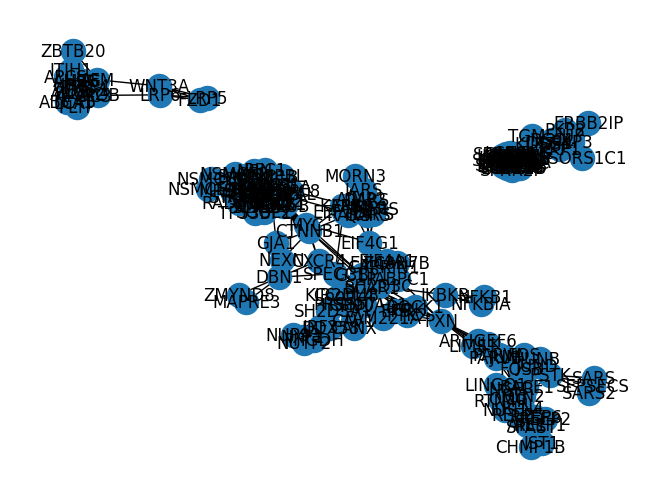

In [64]:
G=nx.from_pandas_edgelist(df,source="node1",target="node2")
nx.draw(G,  with_labels = True)

In [45]:
from pyvis.network import Network
net=Network(notebook="True")
net.from_nx(G)
net.show("example.html")


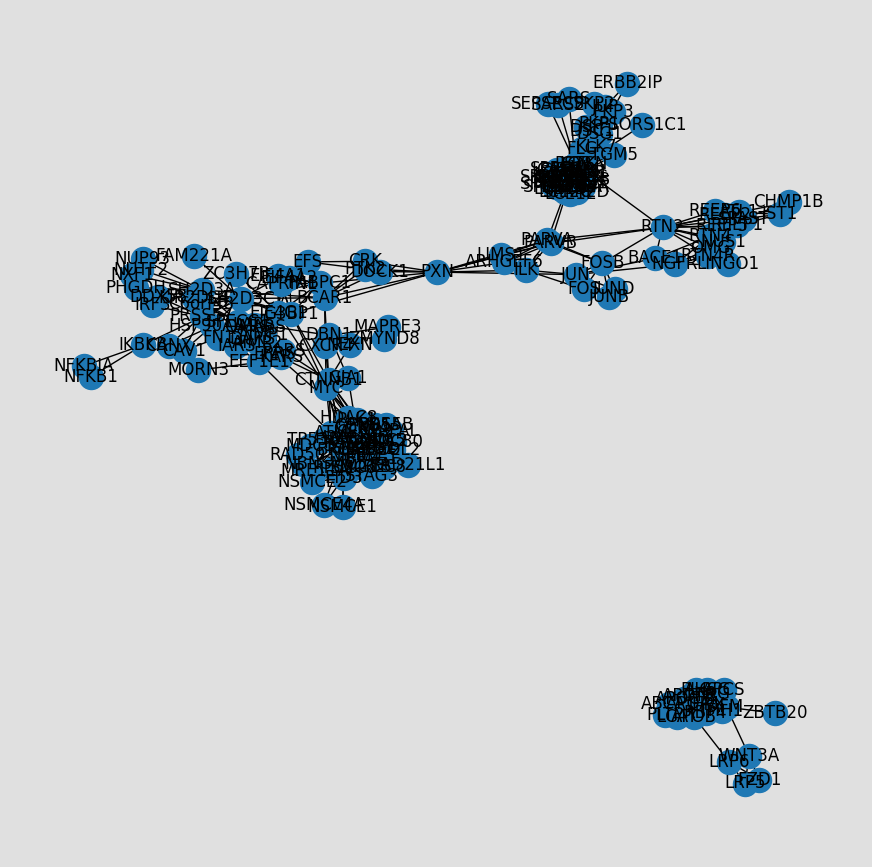

In [46]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(11,11),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

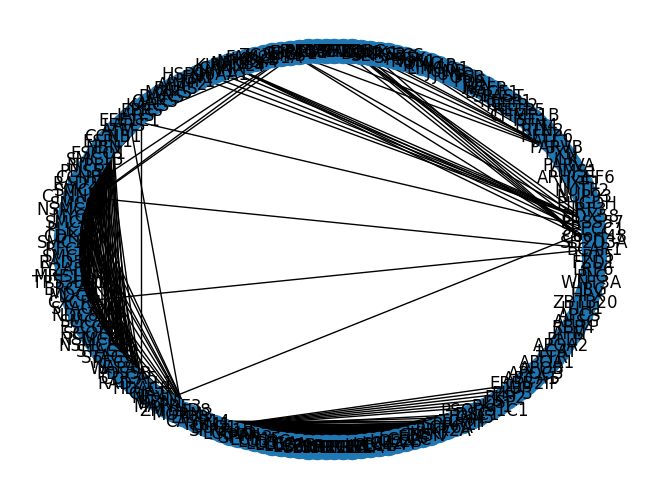

In [38]:
G = nx.from_pandas_edgelist(df, source = 'node1', target='node2', edge_attr=None)
pos = nx.circular_layout(G)
nx.draw(G, pos=pos, with_labels = True)

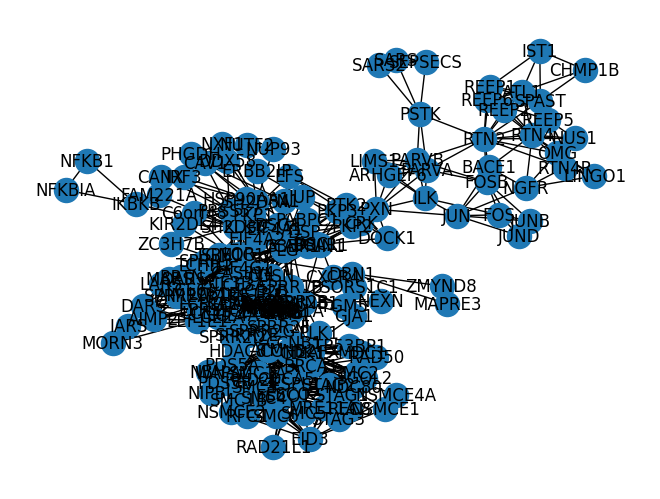

In [39]:
nx.draw_kamada_kawai(starWars, with_labels = True)


In [65]:
# Import libraries
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline

In [66]:
G.degree('SPRR2G')


28

In [67]:
#Degree centrality for unweighted graph
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'BCAR1': 0.043243243243243246,
 'SH2D3A': 0.06486486486486487,
 'C6orf48': 0.02702702702702703,
 'SPECC1': 0.03783783783783784,
 'PRSS57': 0.06486486486486487,
 'DDX58': 0.016216216216216217,
 'IRF3': 0.021621621621621623,
 'PHGDH': 0.021621621621621623,
 'NUP93': 0.016216216216216217,
 'NUTF2': 0.021621621621621623,
 'NXF1': 0.021621621621621623,
 'ARHGEF6': 0.02702702702702703,
 'LIMS1': 0.02702702702702703,
 'PARVA': 0.043243243243243246,
 'ILK': 0.03783783783783784,
 'PXN': 0.06486486486486487,
 'PARVB': 0.043243243243243246,
 'ATL1': 0.04864864864864865,
 'REEP6': 0.021621621621621623,
 'RTN2': 0.08108108108108109,
 'RTN4': 0.07027027027027027,
 'IST1': 0.021621621621621623,
 'CHMP1B': 0.016216216216216217,
 'REEP5': 0.03783783783783784,
 'REEP2': 0.02702702702702703,
 'REEP1': 0.032432432432432434,
 'SPAST': 0.043243243243243246,
 'BACE1': 0.021621621621621623,
 'NGFR': 0.032432432432432434,
 'JUN': 0.043243243243243246,
 'FOS': 0.02702702702702703,
 'FOSB': 0.03783783783783784,

In [68]:
#Undirected and unweigted graph
closeness_centrality = nx.closeness_centrality(G)
#Sort for identifying most inflential nodes using closeness_centrality
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
  print(node, closeness_centrality[node])

G3BP1 0.2524024024024024
CTNNB1 0.2463204168023445
MYC 0.24266581121180528
BCAR1 0.24123415450849078
EIF4G1 0.22590712259220547
ATM 0.2210226442658875
PXN 0.21983435047951175
BRCA1 0.21749568717653825
CDK1 0.2169187755394652
PABPC1 0.21352057017853363
H2AFX 0.21352057017853363
CCNB1 0.2124113724113724
CXCR4 0.21022719377475163
CCNB2 0.20808747678976688
SH2D3C 0.20703386931235032
PLK1 0.2039361056817416
PRSS57 0.2024217286593524
SH2D3A 0.20142457728664626
SPECC1 0.20092967660535227
EPRS 0.19994713539945813
CDSN 0.19656019656019658
EEF1E1 0.19611121913280186
CRK 0.1947104247104247
PTK2 0.1947104247104247
GJA1 0.1947104247104247
DOCK1 0.1942479296398536
HSP90AA1 0.1937876264890483
LOR 0.1921921921921922
RARS 0.19151845053484395
KARS 0.19151845053484395
CAPRIN1 0.19018227529855436
EIF4A1 0.19018227529855436
EIF4A2 0.19018227529855436
FN1 0.18974101711920735
AIMP1 0.18974101711920735
IVL 0.18801410105757932
DBN1 0.18670862643465383
MARS 0.18628332204641998
QARS 0.18628332204641998
LARS 0.18

In [69]:
betweenness_centrality = nx.betweenness_centrality(G)
#Sort for identifying most inflential nodes using closeness_centrality
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  print(node, betweenness_centrality[node])

PXN 0.16629737400332364
G3BP1 0.14227296816810187
CTNNB1 0.11284871647547852
BCAR1 0.07197686936424873
RTN2 0.07137737115997993
MYC 0.06170670363105749
ATM 0.05033450126064898
BRCA1 0.04855252629878022
PARVA 0.04763905209557383
PARVB 0.04763905209557383
SH2D3C 0.043683550985308475
EIF4G1 0.040869810042629275
JUN 0.04025404286273851
SH2D3A 0.03888855698102034
EEF1E1 0.03209125183167027
CDK1 0.031963783020834226
H2AFX 0.02447069663774866
PSTK 0.02118096357226792
SPECC1 0.020767362450460923
CCNB1 0.018633540955187267
PABPC1 0.017498687488240756
PRSS57 0.016825550039883865
DBN1 0.0157669473634595
IKBKB 0.014218566392479436
EPRS 0.012167133037756671
NGFR 0.011583431257344338
HDAC8 0.008436063120449323
CXCR4 0.007993254930595084
CCNB2 0.007803208432142123
ATL1 0.006012534273403863
GJA1 0.005868828889573762
ESPL1 0.005850052737455769
SPAST 0.005841167254210754
CDSN 0.005585811564072432
ESCO2 0.005147315298709227
HSP90AA1 0.004991488439383606
ESCO1 0.004743392348645539
FLG 0.004510143205795381

In [70]:
#ClusteringCoefficient for unweighted graph
clustering = nx.clustering(G)
clustering

{'BCAR1': 0.25,
 'SH2D3A': 0.24242424242424243,
 'C6orf48': 0.9,
 'SPECC1': 0.42857142857142855,
 'PRSS57': 0.3333333333333333,
 'DDX58': 1.0,
 'IRF3': 0.6666666666666666,
 'PHGDH': 0.6666666666666666,
 'NUP93': 1.0,
 'NUTF2': 0.8333333333333334,
 'NXF1': 0.8333333333333334,
 'ARHGEF6': 1.0,
 'LIMS1': 1.0,
 'PARVA': 0.5357142857142857,
 'ILK': 0.5714285714285714,
 'PXN': 0.2727272727272727,
 'PARVB': 0.5357142857142857,
 'ATL1': 0.5555555555555556,
 'REEP6': 1.0,
 'RTN2': 0.2857142857142857,
 'RTN4': 0.3974358974358974,
 'IST1': 0.8333333333333334,
 'CHMP1B': 1.0,
 'REEP5': 0.6666666666666666,
 'REEP2': 1.0,
 'REEP1': 0.8,
 'SPAST': 0.6071428571428571,
 'BACE1': 0.5,
 'NGFR': 0.5333333333333333,
 'JUN': 0.32142857142857145,
 'FOS': 0.7,
 'FOSB': 0.42857142857142855,
 'JUND': 1.0,
 'JUNB': 1.0,
 'LINGO1': 1.0,
 'RTN4R': 0.7333333333333333,
 'OMG': 0.6666666666666666,
 'NUS1': 0.9,
 'PSTK': 0.3333333333333333,
 'SARS': 1.0,
 'SEPSECS': 0.6666666666666666,
 'SARS2': 1.0,
 'DOCK1': 1.0,
 '

In [121]:
vk = dict(G.degree())
vk = list(vk.values())
print('Degree', vk)


Degree [1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]
